In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("signal.csv")

In [3]:
dummy_1=data[['TEST TYPE','TEST NAME']]

In [4]:
xxxx=pd.get_dummies(dummy_1)

In [5]:
xxxx

,TEST TYPE_MOTOR IMAGES,TEST TYPE_VISUAL,TEST NAME_FIVE BOX 1,TEST NAME_FIVE BOX 2,TEST NAME_FIVE BOX 3,TEST NAME_HAND SHAKE,TEST NAME_IMAGE SEARCH
0,0,1,0,0,0,0,1
1,0,1,1,0,0,0,0
2,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0
4,0,1,0,1,0,0,0
5,0,1,0,0,1,0,0
6,1,0,0,0,0,1,0
7,0,1,0,0,0,0,1
8,0,1,1,0,0,0,0
9,0,1,0,1,0,0,0


In [6]:
y_gender=pd.get_dummies(data['GENDER'])
y_gender

,FEM,MALE
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)
x=xxxx
y=y_gender

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('accuracy: ', knn.score(x_test,y_test))

accuracy:  0.5348837209302325


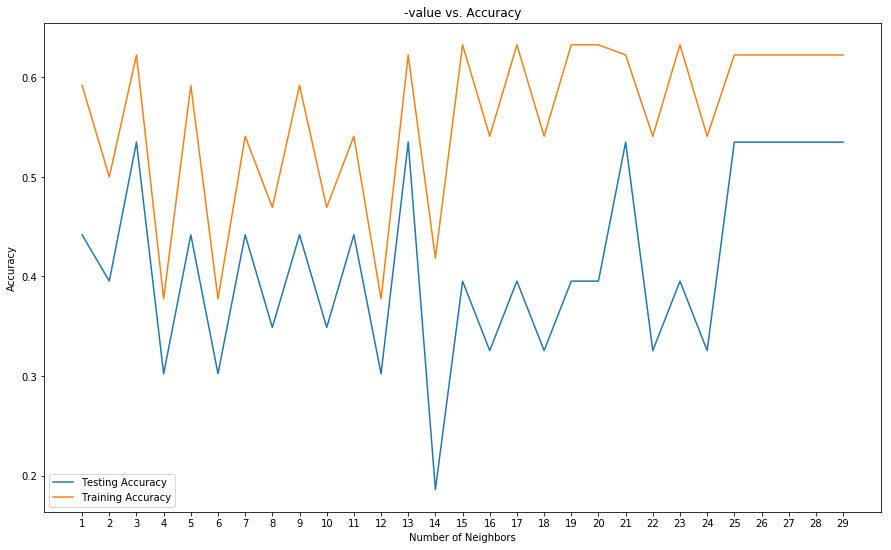

Best Accuracy is 0.5348837209302325 with K = 3


In [9]:
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.figure(figsize=(15,9))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))